In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [21]:
data=pd.read_csv(r'D:\Homework\5G预测\train.csv')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 60 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      800000 non-null  int64  
 1   cat_0   800000 non-null  int64  
 2   cat_1   800000 non-null  int64  
 3   cat_2   800000 non-null  int64  
 4   cat_3   800000 non-null  int64  
 5   cat_4   800000 non-null  int64  
 6   cat_5   800000 non-null  int64  
 7   cat_6   800000 non-null  int64  
 8   cat_7   800000 non-null  int64  
 9   cat_8   800000 non-null  int64  
 10  cat_9   800000 non-null  int64  
 11  cat_10  800000 non-null  int64  
 12  cat_11  800000 non-null  int64  
 13  cat_12  800000 non-null  float64
 14  cat_13  800000 non-null  int64  
 15  cat_14  800000 non-null  int64  
 16  cat_15  800000 non-null  int64  
 17  cat_16  800000 non-null  int64  
 18  cat_17  800000 non-null  int64  
 19  cat_18  800000 non-null  int64  
 20  cat_19  800000 non-null  int64  
 21  num_0   80

In [23]:
missing_values = data.isnull().sum()
print(missing_values)

id        0
cat_0     0
cat_1     0
cat_2     0
cat_3     0
cat_4     0
cat_5     0
cat_6     0
cat_7     0
cat_8     0
cat_9     0
cat_10    0
cat_11    0
cat_12    0
cat_13    0
cat_14    0
cat_15    0
cat_16    0
cat_17    0
cat_18    0
cat_19    0
num_0     0
num_1     0
num_2     0
num_3     0
num_4     0
num_5     0
num_6     0
num_7     0
num_8     0
num_9     0
num_10    0
num_11    0
num_12    0
num_13    0
num_14    0
num_15    0
num_16    0
num_17    0
num_18    0
num_19    0
num_20    0
num_21    0
num_22    0
num_23    0
num_24    0
num_25    0
num_26    0
num_27    0
num_28    0
num_29    0
num_30    0
num_31    0
num_32    0
num_33    0
num_34    0
num_35    0
num_36    0
num_37    0
target    0
dtype: int64


In [24]:
print("数据集重复行数量：", data.duplicated().sum())

数据集重复行数量： 0


In [25]:
data.head()

,id,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,...,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37,target
0,0,2,103,9,4,3,1,3,4,4,...,2.000000,3.0,0.000000,0.0,0.0,0.0,0.0,0.089758,0.000129,0.0
1,1,0,177,6,2,2,1,2,4,4,...,0.968742,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000312,0.0
2,2,7,70,7,4,5,0,3,4,4,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000164,0.0
3,3,11,166,7,2,3,1,1,1,2,...,0.021729,0.0,0.021729,0.0,0.0,0.0,0.0,0.000081,0.000205,0.0
4,4,0,178,10,4,3,0,4,4,4,...,30.000000,30.0,0.000000,0.0,0.0,0.0,0.0,6127.621124,0.000298,0.0


In [35]:
data.describe()

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37,target
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,...,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,8.000000e+05,8.000000e+05,800000.000000,800000.000000
mean,11.326667,93.369439,6.133563,2.910350,1.719691,0.618034,3.059024,3.946736,1.948813,2.889144,...,0.577225,0.459445,0.234565,0.140854,0.075833,0.000029,7.928699e-05,1.828583e-02,0.150664,0.013250
std,7.532890,84.283980,2.485475,0.424801,1.155052,0.485869,2.062829,0.403059,0.300025,1.329879,...,0.368733,0.368901,0.281909,0.238549,0.171886,0.003008,2.230797e-03,3.384344e-02,0.209919,0.114344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.000000,25.000000,6.000000,3.000000,1.000000,0.000000,2.000000,4.000000,2.000000,3.000000,...,0.200000,0.083499,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.249169e-07,0.034434,0.000000
50%,11.000000,66.000000,6.000000,3.000000,1.000000,1.000000,3.000000,4.000000,2.000000,3.000000,...,0.666667,0.426213,0.100000,0.023456,0.000000,0.000000,2.744894e-12,2.869106e-03,0.074762,0.000000
75%,17.000000,141.000000,8.000000,3.000000,3.000000,1.000000,4.000000,4.000000,2.000000,3.000000,...,0.933333,0.833333,0.400000,0.166667,0.066532,0.000000,1.662253e-09,2.241264e-02,0.164962,0.000000
max,30.000000,357.000000,9.000000,4.000000,4.000000,1.000000,11.000000,5.000000,3.000000,13.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000


In [26]:
data.drop('id',axis=1,inplace=True)

In [27]:
object_column = [string for string in data.columns if string.startswith('cat')]
object_column

['cat_0',
 'cat_1',
 'cat_2',
 'cat_3',
 'cat_4',
 'cat_5',
 'cat_6',
 'cat_7',
 'cat_8',
 'cat_9',
 'cat_10',
 'cat_11',
 'cat_12',
 'cat_13',
 'cat_14',
 'cat_15',
 'cat_16',
 'cat_17',
 'cat_18',
 'cat_19']

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in object_column:
    data[[i]] = label_encoder.fit_transform(data[[i]])

In [29]:
num_column = [string for string in data.columns if string.startswith('num')]
num_column

['num_0',
 'num_1',
 'num_2',
 'num_3',
 'num_4',
 'num_5',
 'num_6',
 'num_7',
 'num_8',
 'num_9',
 'num_10',
 'num_11',
 'num_12',
 'num_13',
 'num_14',
 'num_15',
 'num_16',
 'num_17',
 'num_18',
 'num_19',
 'num_20',
 'num_21',
 'num_22',
 'num_23',
 'num_24',
 'num_25',
 'num_26',
 'num_27',
 'num_28',
 'num_29',
 'num_30',
 'num_31',
 'num_32',
 'num_33',
 'num_34',
 'num_35',
 'num_36',
 'num_37']

In [30]:
scaler = MinMaxScaler()

for i in num_column:
    data[[i]] = scaler.fit_transform(data[[i]])

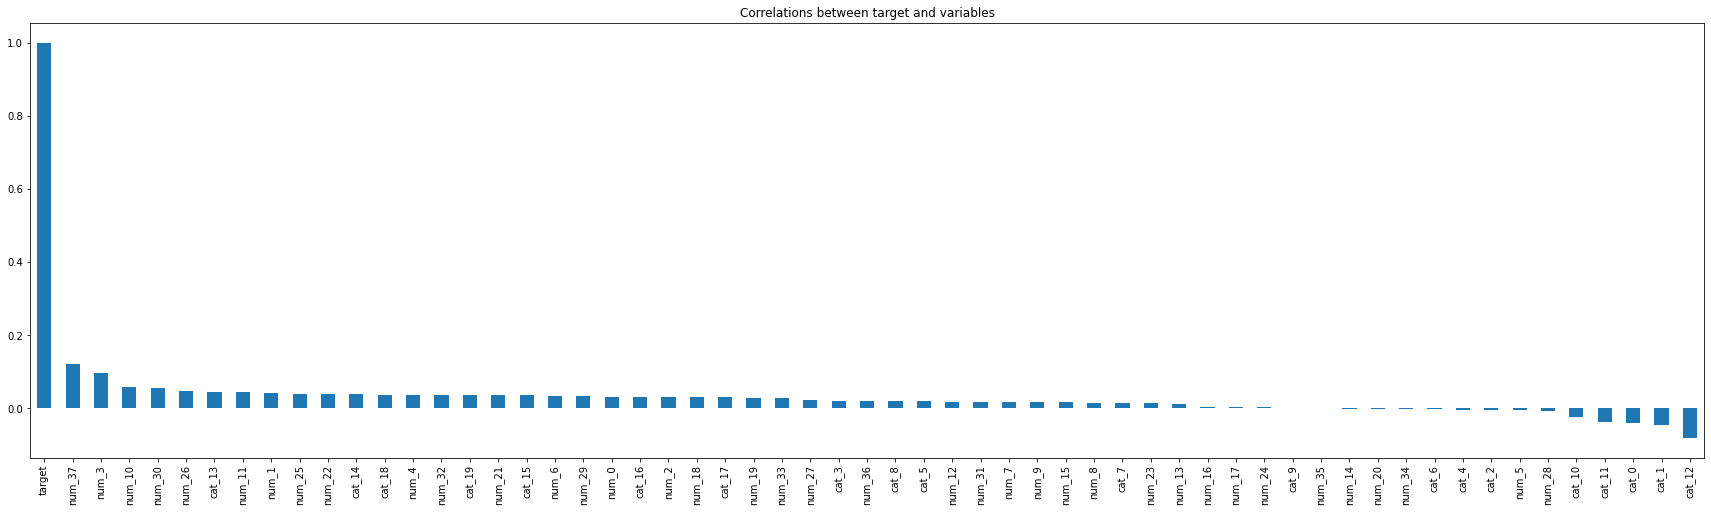

In [37]:
import matplotlib.pyplot as plt

def corr_fig(target):
    plt.figure(figsize=(30,8))
    data.corr()[target].sort_values(ascending = False).plot(kind='bar')
    plt.title("Correlations between target and variables")
    plt.show()
corr_fig('target')


In [41]:
data

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37,target
0,2,103,8,3,1,1,2,4,2,3,...,0.066667,0.100000,0.000000,0.000000,0.0,0.0,0.000000e+00,3.686957e-07,0.039379,0.0
1,0,177,5,1,0,1,1,4,2,3,...,0.032291,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.094866,0.0
2,7,70,6,3,3,0,2,4,2,3,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.050032,0.0
3,11,166,6,1,1,1,0,1,0,3,...,0.000724,0.000000,0.000724,0.000000,0.0,0.0,0.000000e+00,3.339292e-10,0.062498,0.0
4,0,178,9,3,1,0,3,4,2,3,...,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,2.517023e-02,0.090761,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,17,224,6,3,3,1,1,4,2,3,...,0.433333,0.233333,0.066667,0.000000,0.0,0.0,0.000000e+00,1.188700e-05,0.003101,0.0
799996,9,62,7,3,2,0,1,4,2,3,...,0.109940,0.066667,0.000000,0.000000,0.0,0.0,0.000000e+00,1.292802e-03,0.041531,0.0
799997,29,111,3,0,3,1,0,0,2,3,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.150417,0.0
799998,18,325,6,3,1,1,3,4,2,3,...,0.900000,0.166667,0.000000,0.000000,0.0,0.0,2.584775e-12,2.422804e-02,0.043344,0.0


In [42]:
import seaborn as sns

correlation = data.corr()
correlation

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37,target
cat_0,1.000000,0.208102,0.015516,-0.038847,-0.006756,-0.001782,0.006626,-0.024447,-0.034420,-0.022736,...,-0.054852,0.000028,-0.024184,-0.026713,0.000240,0.000373,-0.004084,-0.028113,-0.215340,-0.038755
cat_1,0.208102,1.000000,-0.026804,-0.020708,0.012412,0.000591,-0.017809,0.000578,-0.020281,0.010021,...,-0.041056,-0.091786,-0.039675,-0.086554,-0.045184,-0.002123,-0.002950,-0.004212,-0.321760,-0.046267
cat_2,0.015516,-0.026804,1.000000,0.009661,-0.162552,0.027532,0.019794,0.004858,0.013469,0.029980,...,0.092551,0.054165,0.087731,0.076886,0.048738,0.003945,0.004650,0.080993,0.028994,-0.005330
cat_3,-0.038847,-0.020708,0.009661,1.000000,-0.066083,0.017959,-0.103658,0.340651,0.723553,0.010923,...,0.299170,0.236112,0.165079,0.117190,0.087550,0.002023,0.007309,0.110065,0.047909,0.021418
cat_4,-0.006756,0.012412,-0.162552,-0.066083,1.000000,-0.025616,0.026752,-0.028362,-0.067988,0.070883,...,-0.208993,-0.147795,-0.144105,-0.106772,-0.075798,-0.002188,-0.007635,-0.152458,-0.009804,-0.003717
cat_5,-0.001782,0.000591,0.027532,0.017959,-0.025616,1.000000,0.029021,0.016002,0.016562,0.005752,...,0.059060,0.057942,0.021292,0.040254,0.054134,0.001482,0.016593,0.053070,0.007849,0.019414
cat_6,0.006626,-0.017809,0.019794,-0.103658,0.026752,0.029021,1.000000,0.022554,-0.109303,0.006611,...,-0.040924,-0.016341,0.032950,0.038290,-0.016806,0.000715,-0.002325,-0.031581,0.026992,-0.002712
cat_7,-0.024447,0.000578,0.004858,0.340651,-0.028362,0.016002,0.022554,1.000000,0.436168,0.008221,...,0.148734,0.111240,0.063937,0.049940,0.043290,0.000409,0.003666,0.050664,0.006021,0.015584
cat_8,-0.034420,-0.020281,0.013469,0.723553,-0.067988,0.016562,-0.109303,0.436168,1.000000,0.005738,...,0.253303,0.200616,0.138610,0.099127,0.073389,0.001633,0.006217,0.091837,0.043718,0.020426
cat_9,-0.022736,0.010021,0.029980,0.010923,0.070883,0.005752,0.006611,0.008221,0.005738,1.000000,...,0.018809,-0.002736,0.018253,0.000667,0.004867,-0.000563,0.000728,0.021191,-0.021625,0.002269


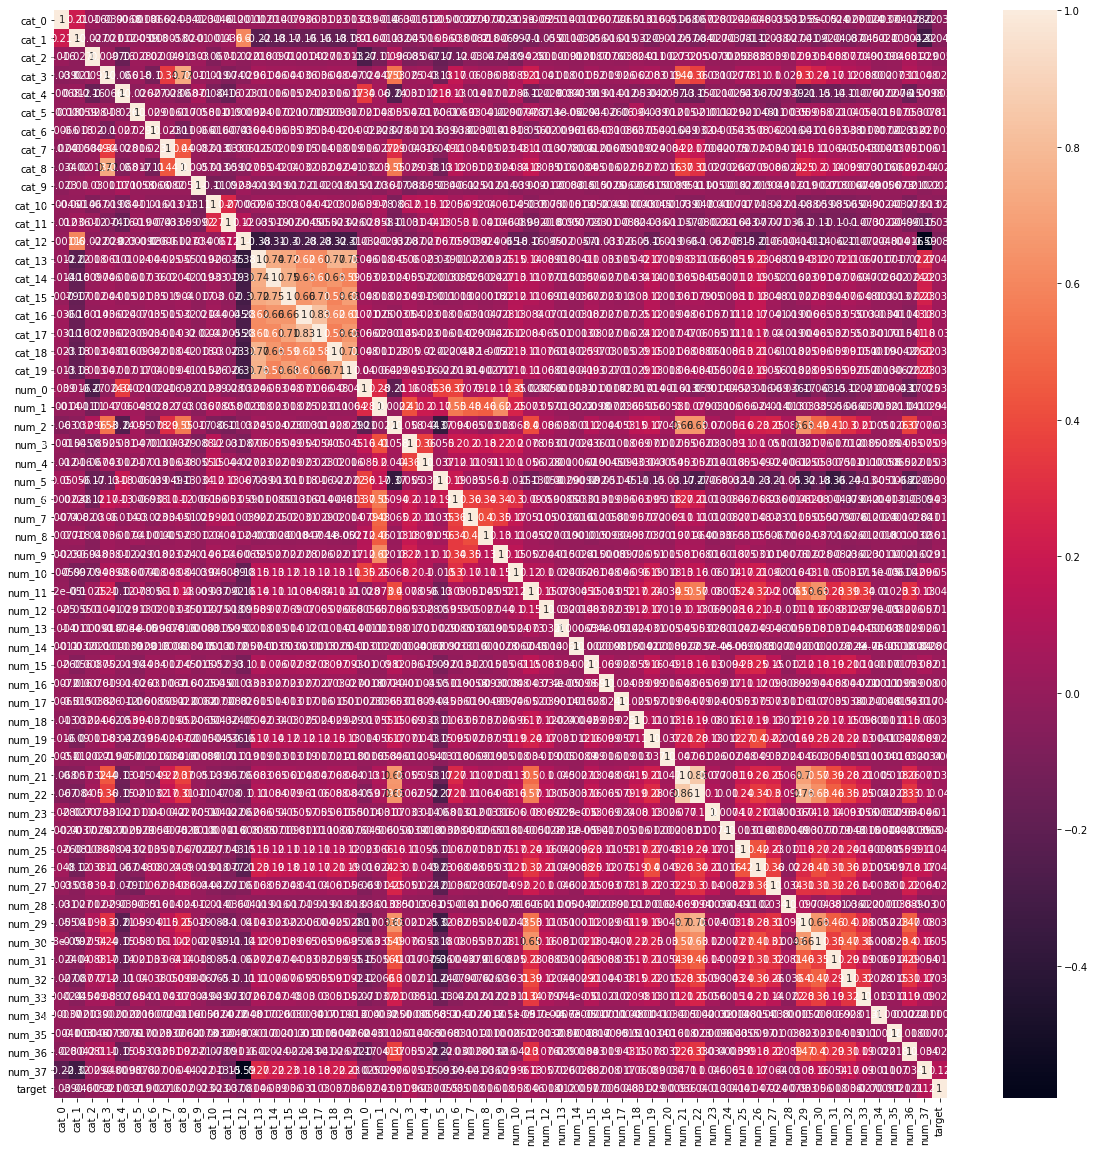

In [43]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True)
plt.show()

In [38]:
data.corr()['target'].sort_values(ascending = False)

target    1.000000
num_37    0.120271
num_3     0.096447
num_10    0.058346
num_30    0.055641
num_26    0.046814
cat_13    0.045830
num_11    0.045770
num_1     0.042625
num_25    0.040669
num_22    0.039780
cat_14    0.039437
cat_18    0.037309
num_4     0.036680
num_32    0.036412
cat_19    0.035875
num_21    0.035867
cat_15    0.035610
num_6     0.034951
num_29    0.033071
num_0     0.032487
cat_16    0.031234
num_2     0.030954
num_18    0.030777
cat_17    0.030181
num_19    0.028967
num_33    0.027442
num_27    0.023567
cat_3     0.021418
num_36    0.020974
cat_8     0.020426
cat_5     0.019414
num_12    0.018359
num_31    0.017871
num_7     0.017730
num_9     0.017589
num_15    0.017247
num_8     0.015664
cat_7     0.015584
num_23    0.013434
num_13    0.011515
num_16    0.004988
num_17    0.004839
num_24    0.004117
cat_9     0.002269
num_35    0.002125
num_14   -0.000571
num_20   -0.000900
num_34   -0.000908
cat_6    -0.002712
cat_4    -0.003717
cat_2    -0.005330
num_5    -0.

In [31]:
X = data.drop(['target'], axis=1)
y = data['target']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
Classifiers = [
               ["LogisticRegression", LogisticRegression()],
               ["Naive Bayes", GaussianNB()],
               ["Decision Tree", DecisionTreeClassifier()],
               ["AdaBoostClassifier", AdaBoostClassifier()],
               ]

In [34]:
Classify_result = []
names = []
prediction = []

for name, classifier in Classifiers:
    print(name)
    classifier = classifier
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    ac=accuracy_score(y_test,y_pred)
    
    class_eva = pd.DataFrame([ac])
    Classify_result.append(class_eva)
    name = pd.Series(name)
    names.append(name)
    y_pred = pd.Series(y_pred)
    prediction.append(y_pred)

names = pd.DataFrame(names)
names = names[0].tolist()
result = pd.concat(Classify_result, axis=1)
result.columns = names
result.index = ["ac"]
result

LogisticRegression
Naive Bayes
Decision Tree
AdaBoostClassifier


,LogisticRegression,Naive Bayes,Decision Tree,AdaBoostClassifier
ac,0.986581,0.986581,0.975106,0.986563
